In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-dark-palette')
import ROOT
from ROOT import TLorentzVector
data = pd.DataFrame.from_csv('truth.csv')
data = data.apply(pd.to_numeric, errors='coerce')
data.drop(['i1','i2','i3'],inplace=True,axis=1)
data.drop(['X','Y','Z','T'],inplace=True,axis=1)

data['Pt'] = np.sqrt(data.Px**2 + data.Py**2)
data['Phi_x'] = np.arccos(data.Px/data.Pt)
data['Phi_y'] = np.arcsin(data.Py/data.Pt)
data['Theta'] = np.arctan(data.Pt/data.Pz)

Welcome to JupyROOT 6.07/05


In [46]:
pt_smear = 1.3e4 #* np.min(data.Pt)
phi_smear = 1e-4 #* np.mean(data.Phi_x)
theta_smear = 1e-4 #* np.mean(data.Theta)

data['Pt_measure'] = np.random.normal(data.Pt,pt_smear*data.Pt,len(data))
data['Phi_measure'] = np.sign(data.Py)*np.random.normal(data.Phi_x,phi_smear,len(data))
data['Phi_x_measure'] = np.random.normal(data.Phi_x,phi_smear,len(data))
data['Phi_y_measure'] = np.random.normal(data.Phi_y,phi_smear,len(data))
data['Theta_measure'] = np.random.normal(data.Theta,theta_smear,len(data))


data['Px_measure'] = data.Pt_measure*np.cos(data.Phi_measure)
data['Py_measure'] = data.Pt_measure*np.sin(data.Phi_measure)

#data['Px_measure'] = data.Pt_measure*np.cos(data.Phi_x_measure)
#data['Py_measure'] = data.Pt_measure*np.sin(data.Phi_y_measure)
data['Pz_measure'] = data.Pt/np.tan(data.Theta_measure)
data['E_measure'] = np.sqrt(data.Px_measure**2 + data.Py_measure**2 + data.Pz_measure**2)

In [47]:
data.head(10)

event      ID  mother  daughter1  daughter2      Px      Py      Pz  \
part                                                                        
0         0  300553      -1          1          2  0.1760  0.0000  4.4988   
1         1     521       0          3          4  0.4054 -0.1093  2.4376   
2         2    -521       0          9         12 -0.2294  0.1093  2.0612   
3         3     333       1          5          6  2.0084 -1.4483  1.7238   
4         4   10321       1          7          8 -1.6030  1.3390  0.7138   
5         5     321       3         32         34  1.2486 -0.9178  1.0902   
6         6    -321       3         35         37  0.7598 -0.5305  0.6336   
7         7     310       4         38         39 -1.6694  0.7277  0.3581   
8         8     211       4         40         43  0.0664  0.6113  0.3558   
9         9     421       2         13         16  0.0409 -0.1006  1.3949   

            E        Pt     ...          Theta    Pt_measure  Phi_x_measure  \
part                        ...                                               
0     11.5028  0.176000     ...       0.039102  -1368.679396       0.000019   
1      5.8299  0.419876     ...       0.170576   1525.566190       0.263226   
2      5.6729  0.254108     ...       0.122663   3115.474891       2.696905   
3      3.1843  2.476135     ...       0.962648  23701.992424       0.624825   
4      2.6456  2.088667     ...       1.241491 -12132.991278       2.445649   
5      1.9580  1.549632     ...       0.957711   -320.498199       0.633955   
6      1.2263  0.926675     ...       0.971070 -21050.392672       0.609493   
7      1.9216  1.821111     ...       1.376635  -5415.469236       2.730569   
8      0.7240  0.614896     ...       1.046235   1152.568362       1.462854   
9      2.3313  0.108596     ...       0.077696    875.957899       1.184544   

      Phi_y_measure  Theta_measure    Px_measure    Py_measure  Pz_measure  \
part                                                                         
0      5.755468e-07       0.038940  -1368.679396     -0.000000    4.517519   
1     -2.632063e-01       0.170577   1473.054708   -396.814851    2.437576   
2      4.446794e-01       0.122782  -2812.601081   1339.947371    2.059170   
3     -6.247195e-01       0.962630  19224.978107 -13863.068262    1.723866   
4      6.960238e-01       1.241623   9311.928010  -7778.012220    0.713491   
5     -6.338085e-01       0.957588   -258.227922    189.835286    1.090483   
6     -6.094837e-01       0.971249 -17260.676175  12049.402045    0.633356   
7      4.112268e-01       1.376760   4964.332434  -2163.957146    0.357864   
8      1.462509e+00       1.046203    124.486631   1145.825863    0.355826   
9     -1.184813e+00       0.077725    329.786726   -811.506597    1.394364   

         E_measure  Phi_measure  
part                             
0      1368.686852     0.000000  
1      1525.568137    -0.263136  
2      3115.475571     2.696996  
3     23701.992486    -0.624745  
4     12132.991299     2.445710  
5       320.500054    -0.633927  
6     21050.392682    -0.609439  
7      5415.469248     2.730525  
8      1152.568417     1.462577  
9       875.959009    -1.184795  

[10 rows x 22 columns]

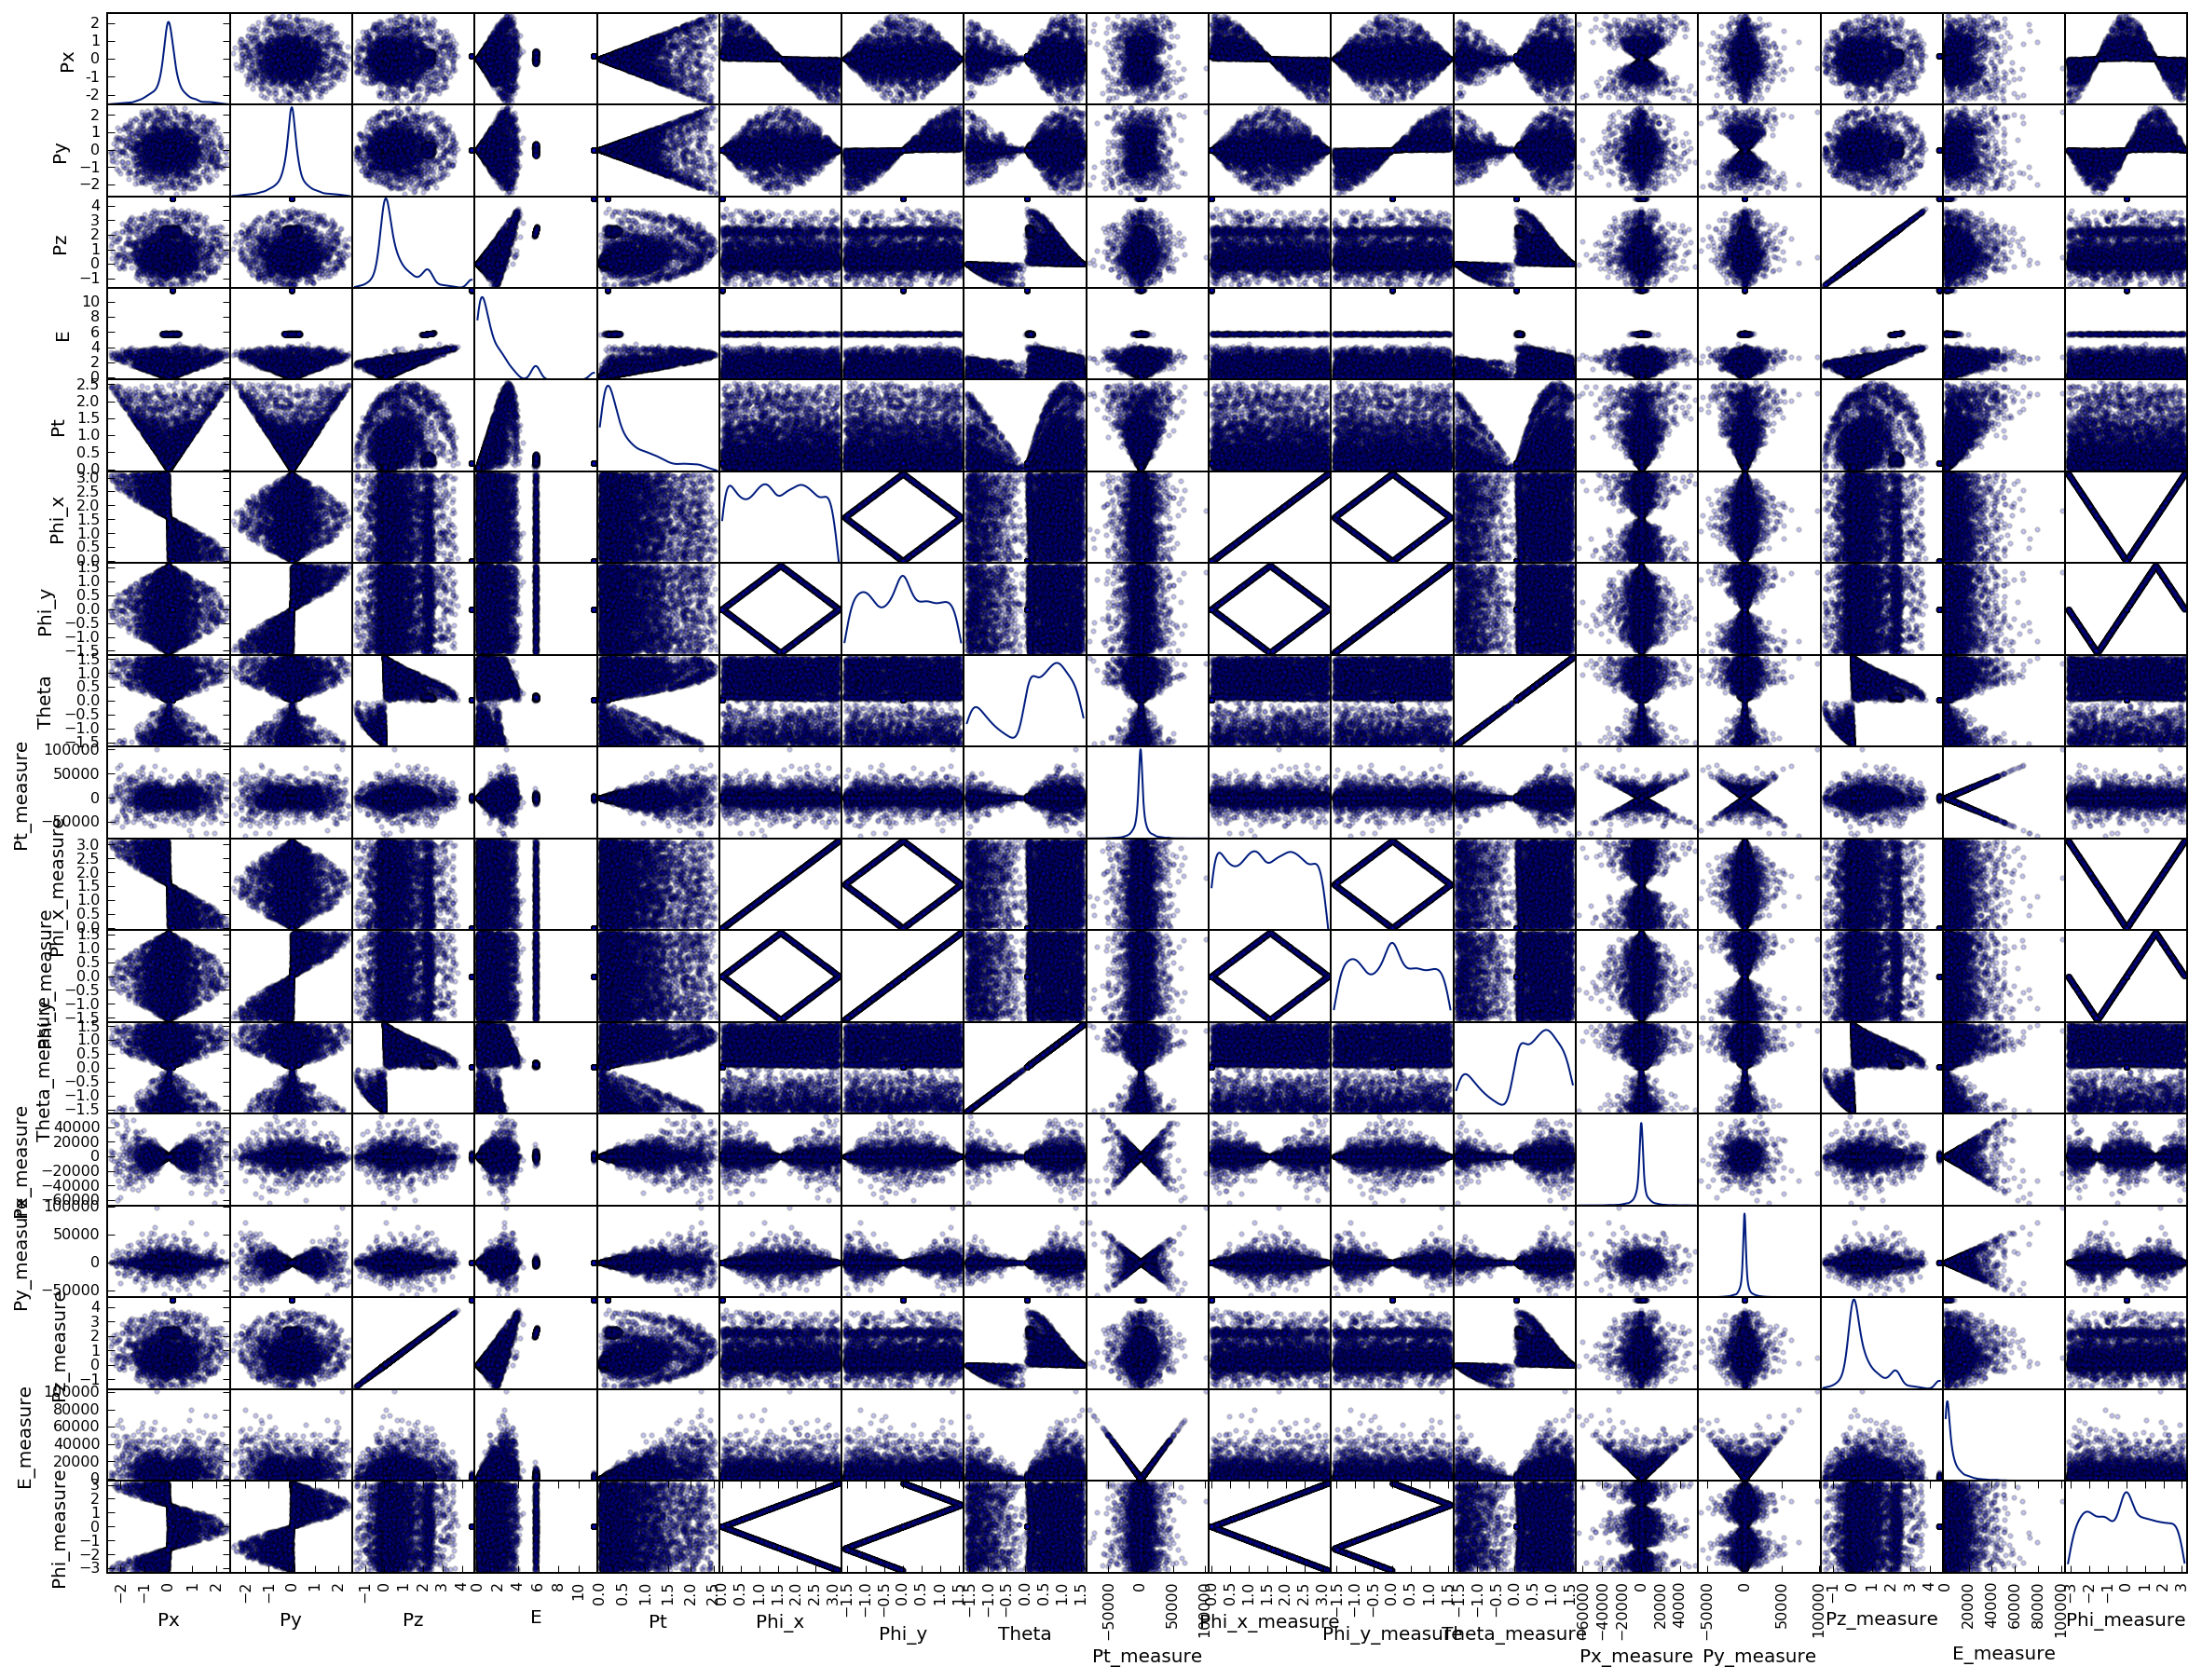

In [48]:
kin = data.drop(['event','ID','mother','daughter1','daughter2'],axis=1)
ax = scatter_matrix(kin, alpha=0.2, figsize=(20, 15),diagonal='kde')

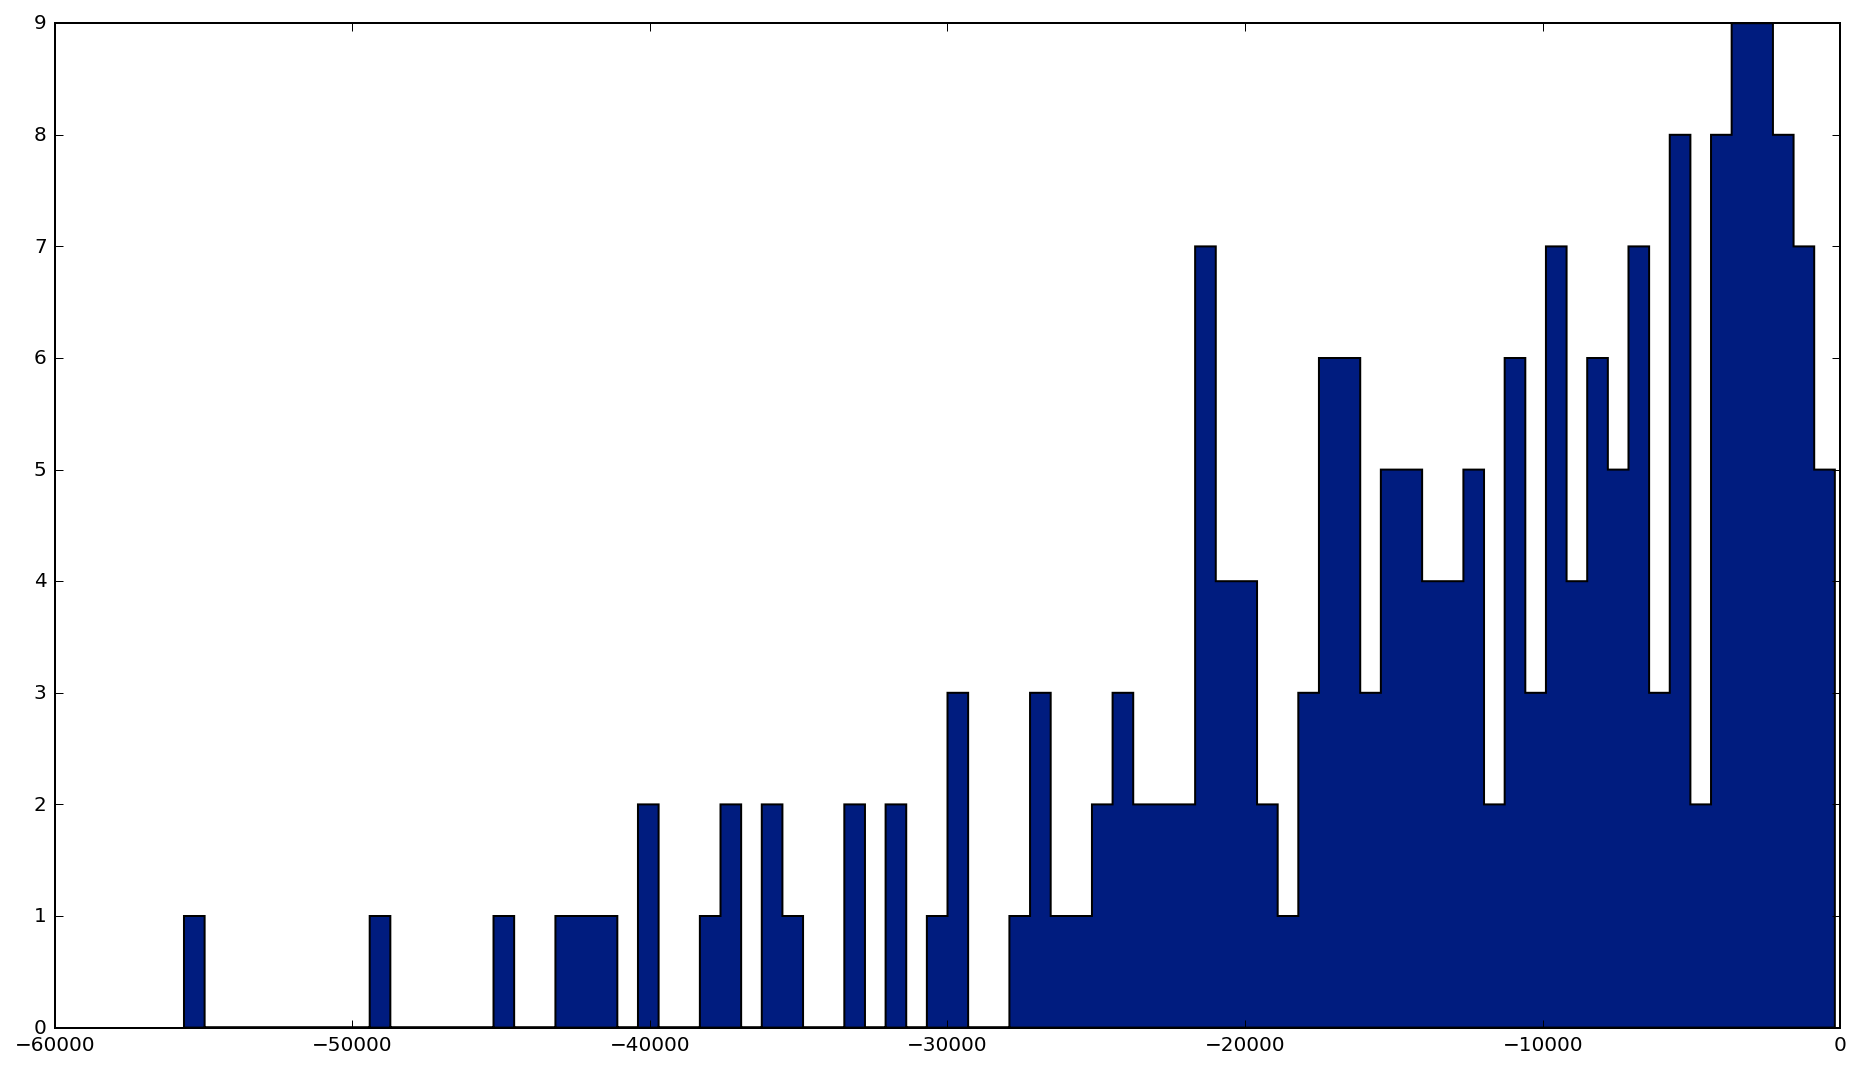

In [49]:
events = pd.DataFrame()
mom = 0
phi_mass = []
temp = TLorentzVector(0,0,0,0)
for index, row in data.iterrows():
    if row.ID == 333:
        if temp.M() != 0 and temp.M() < 1.06:
            phi_mass.append(temp.M())
        temp.SetPxPyPzE(0,0,0,0)
        mom = row['event']
    elif np.abs(row.ID) == 321 and row.mother == mom:
        temp = temp + TLorentzVector(row.Px_measure,row.Py_measure,row.Pz_measure,row.E)
        events = events.append(row)

events = events.apply(pd.to_numeric, errors='coerce')

phi_mass = np.array(phi_mass)

fig = plt.figure(figsize=(16,9))

bins = 80
ax = plt.hist(phi_mass,histtype='stepfilled',bins=bins)

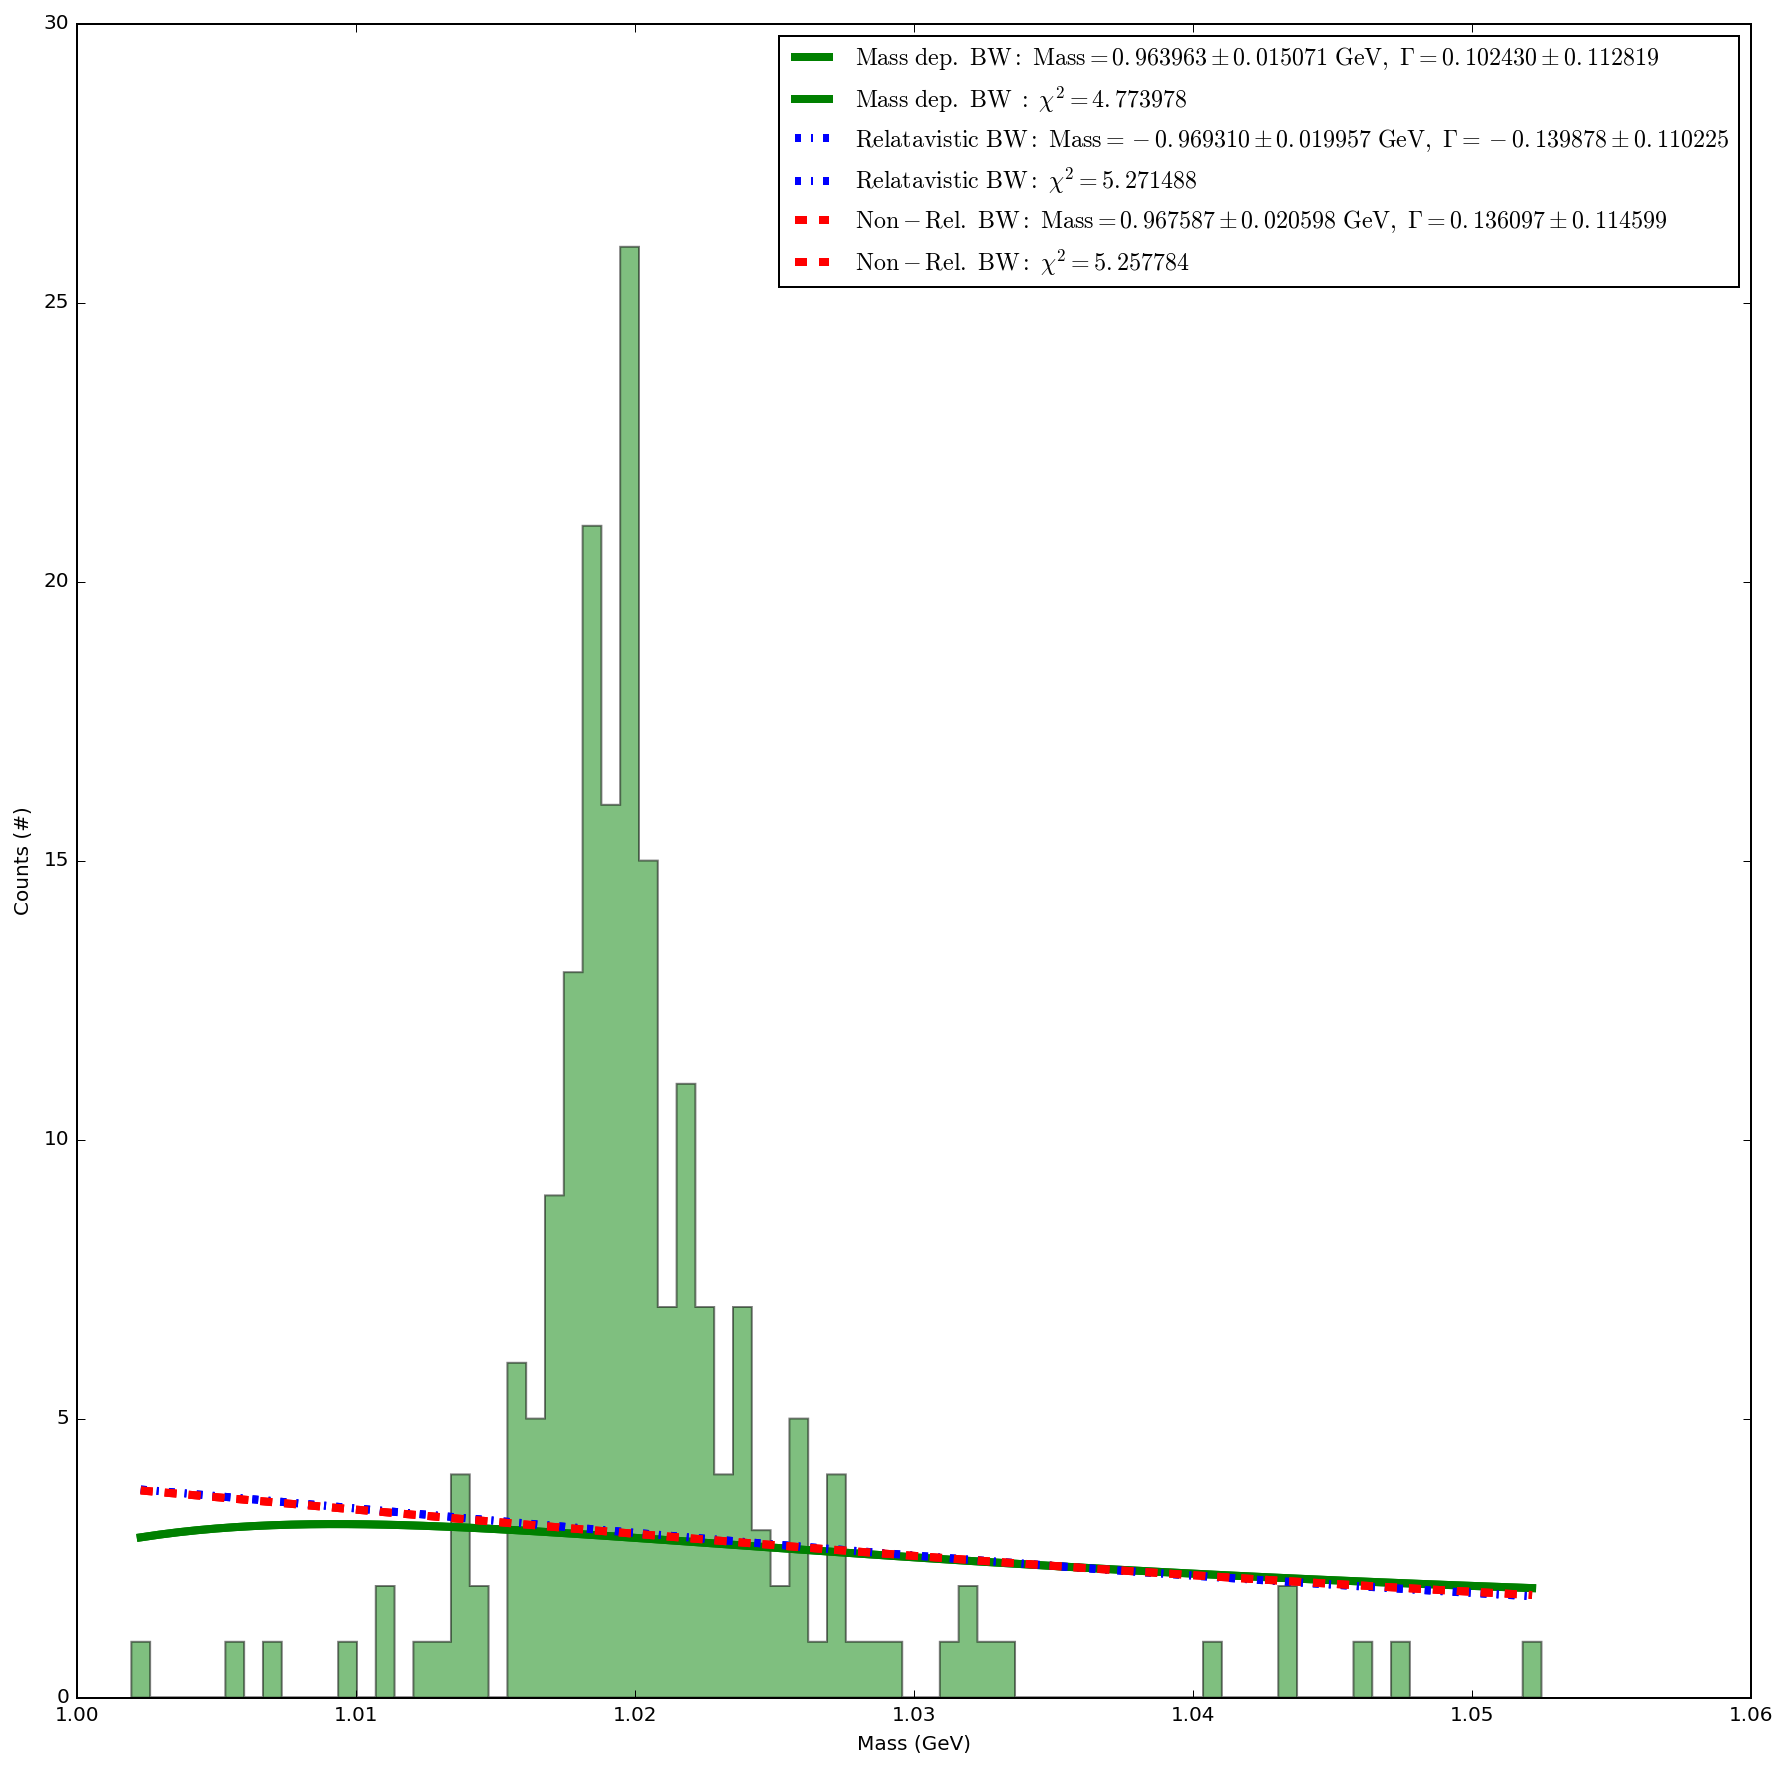

In [44]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from StringIO import StringIO
from ROOT import TLorentzVector
from scipy.optimize import curve_fit

fig = plt.figure(num=None, figsize=(15, 15), dpi=200, facecolor='w', edgecolor='k')
m_k = 0.493677
m_phi = 1.019461

num_bins = 75

def BW(Energy,Mass,Gamma):
    g = ((Mass**2.0 + Gamma**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*Mass)**2.0))

def BW_NonR(Energy,Mass,Gamma):
    return (((Gamma/(2.0*np.pi)))/((Energy-Mass)**2.0 + (Gamma/2.0)**2.0))

def BW_2(Energy,Mass,Gamma):
    g = ((Mass**2.0 + Gamma*P_fac(Energy)**2.0)*Mass**2.0)**(1.0/2.0)
    k = (2.0 * 2.0**(1.0/2.0) * Mass * Gamma*P_fac(Energy) * g)/(np.pi * (Mass**(2.0)+g)**(1.0/2.0))
    return (k/((Energy**2.0-Mass**2.0)**2.0 + (Gamma*P_fac(Energy)*Mass)**2.0))

def P_fac(Energy):
    p = ((Energy**2.0/4.0)-m_k**2.0)**(1.0/2.0)
    p0 = ((m_phi**2.0/4.0)-m_k**2.0)**(1.0/2.0)
    return (p/p0)**3.0

def chi_2(ys,yknown):
    total = 0
    for i in xrange(len(yknown)):
        temp = (ys[i]-yknown[i])**2.0
        if yknown[i] == 0:
            total += temp
        else :
            total += temp/yknown[i]
    return total/len(yknown)

mass_sum = phi_mass


hist, bin_edges = numpy.histogram(mass_sum,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

n, bins, patches = plt.hist(mass_sum, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.5)

n = len(xdata)
mean = sum(xdata*ydata)/n 

x0 = np.array([mean,1])

popt_3, pcov_3 = curve_fit(BW_2, xdata, ydata, p0=x0)
perr_3 = np.sqrt(np.diag(pcov_3))
plt.plot(xdata,BW_2(xdata,popt_3[0],popt_3[1]),'g-', lw=4,
    label=r'$\mathrm{Mass \ dep. \ BW:\ Mass=%.6f \pm %.6f \ GeV,}\ \Gamma=%.6f \pm %.6f$' %(popt_3[0], perr_3[0], popt_3[1], perr_3[1]))
plt.plot(xdata,BW_2(xdata,popt_3[0],popt_3[1]),'g-', lw=4,
    label=r'$\mathrm{Mass \ dep. \ BW \ : \ \chi^{2} = %.6f}$' %(chi_2(BW_2(xdata,popt_3[0],popt_3[1]),ydata)))

popt_1, pcov_1 = curve_fit(BW, xdata, ydata, p0=x0)
perr_1 = np.sqrt(np.diag(pcov_1))
plt.plot(xdata,BW(xdata,popt_1[0],popt_1[1]),'b-.', lw=4,
    label=r'$\mathrm{Relatavistic \ BW:\ Mass=%.6f \pm %.6f \ GeV,}\ \Gamma=%.6f \pm %.6f$' %(popt_1[0], perr_1[0], popt_1[1], perr_1[1]))
plt.plot(xdata,BW(xdata,popt_1[0],popt_1[1]),'b-.', lw=4,
    label=r'$\mathrm{Relatavistic \ BW: \ \chi^{2} = %.6f}$' %(chi_2(BW(xdata,popt_1[0],popt_1[1]),ydata)))

popt_2, pcov_2 = curve_fit(BW_NonR, xdata, ydata, p0=x0)
perr_2 = np.sqrt(np.diag(pcov_2))
plt.plot(xdata,BW_NonR(xdata,popt_2[0],popt_2[1]),'r--', lw=4,
    label=r'$\mathrm{Non-Rel. \ BW:\ Mass=%.6f \pm %.6f \ GeV,}\ \Gamma=%.6f \pm %.6f$' %(popt_2[0], perr_2[0], popt_2[1], perr_2[1]))
plt.plot(xdata,BW_NonR(xdata,popt_2[0],popt_2[1]),'r--', lw=4,
    label=r'$\mathrm{Non-Rel. \ BW: \ \chi^{2} = %.6f}$' %(chi_2(BW_NonR(xdata,popt_2[0],popt_2[1]),ydata)))

plt.xlabel(r'Mass (GeV)')
plt.ylabel(r'Counts (#)')
plt.legend()
plt.show()

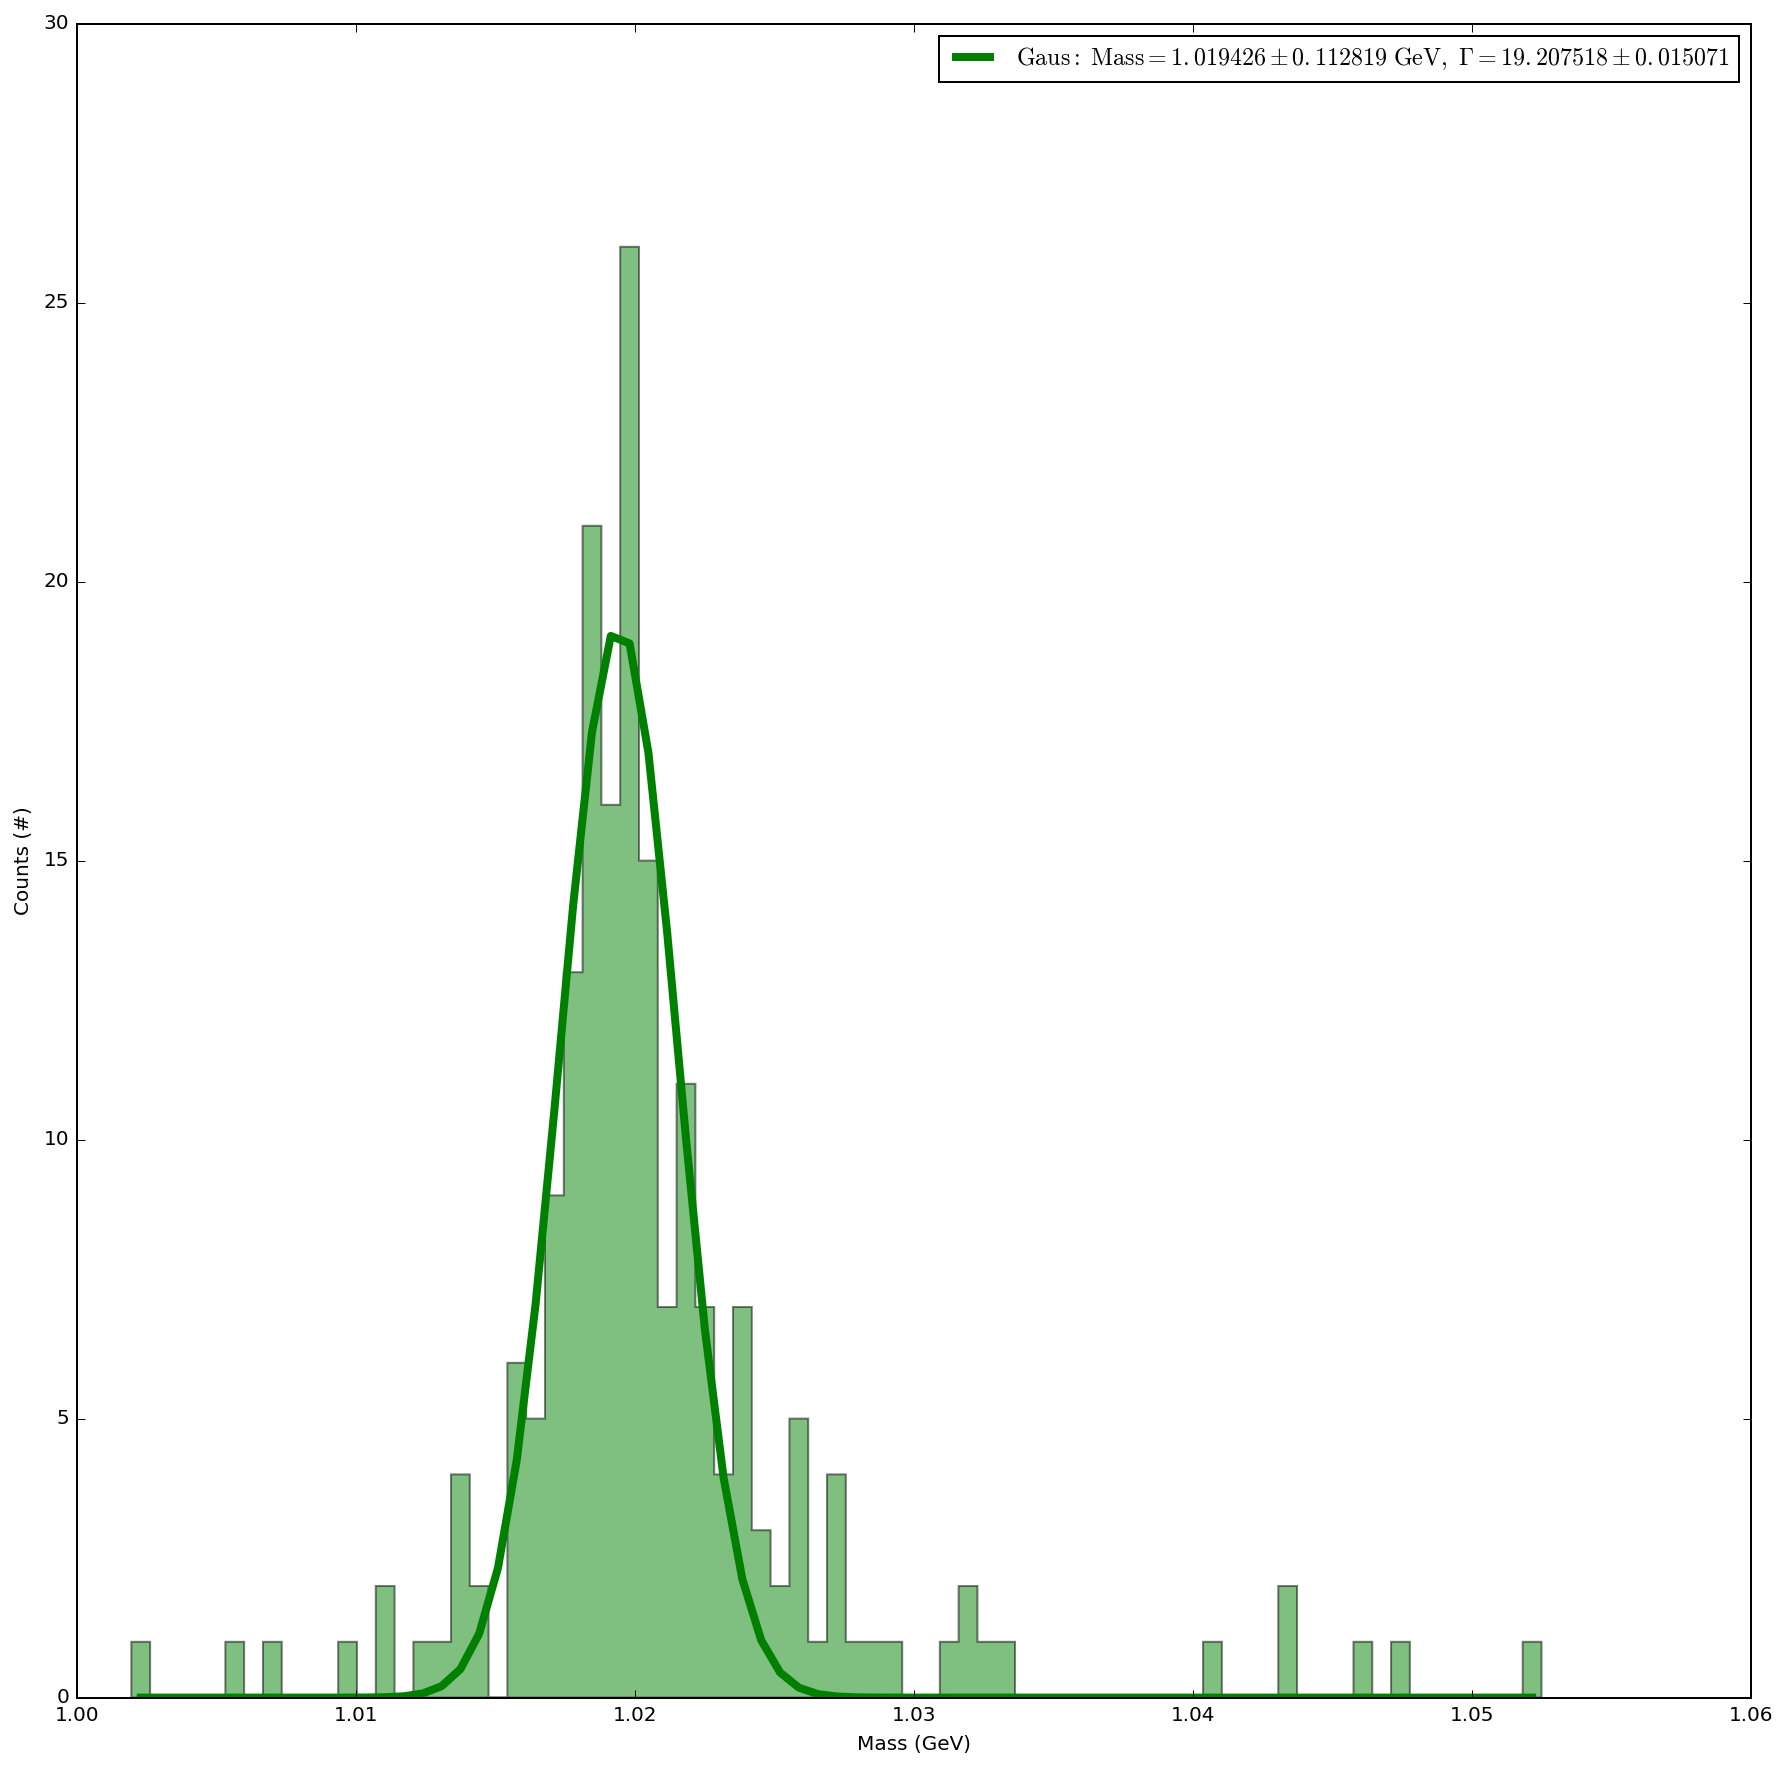

In [45]:
fig = plt.figure(num=None, figsize=(15, 15), dpi=200, facecolor='w', edgecolor='k')
mass_sum = phi_mass

hist, bin_edges = numpy.histogram(mass_sum,bins=num_bins)
xdata = 0.5*(bin_edges[1:]+bin_edges[:-1])
ydata = hist

n = len(xdata)
mean = sum(xdata*ydata)/n 
sigma = sum(ydata*(xdata-mean)**2)/n

def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

n, bins, patches = plt.hist(mass_sum, num_bins, histtype=u'stepfilled',facecolor='g' , alpha=0.5)

popt, pcov = curve_fit(gauss, xdata, ydata,p0=[1,mean,1])
perr = np.sqrt(np.diag(pcov_3))
plt.plot(xdata,gauss(xdata,*popt),'g-', lw=4,
    label=r'$\mathrm{Gaus:\ Mass=%.6f \pm %.6f \ GeV,}\ \Gamma=%.6f \pm %.6f$' %(popt[1], perr[1], popt[0], perr[0]))


plt.xlabel(r'Mass (GeV)')
plt.ylabel(r'Counts (#)')
plt.legend()
plt.show()